# CS559 - F20 Project #1

## Task Desciption
You are provided with an anonymized dataset containing numeric feature variables, the binary target column, and a string ID_code column.

The task is to predict the value of `target` column in the test set using either **Logistic Regression** and **SVM**. You are welcome to use **regularizaiton**. 

## File descriptions
- train.csv - the training set (202 columns)

- test.csv - the test set. The test set contains some rows which are not included in scoring.

## Rules
- The data does not have specific column names. Therefore, you will not know what data is about. 
- However, you still can do classicaition problem without clustering the training set. **No unsupervised learning techniques in this project**. 
- There are 202 columns. This means that the key of high accuracy comes from **EDA** and **feature enegineering**. 
- There are no rules on EDA and Feature Engineering. 
- On your model, make sure you can reduce the columns at the most of 25%. If we use all columns, we may have high computational cost and getting into bias-variance tradeoff and underfit vs. overfit situations. 
- The project is out of 100. 
    - 50 points will come from your EDA and any pre-processing work. 
    - 30 points will come from your model: Accuracy + overcoming any ML challenges. 
    - 10 points will come from in-class competition. 
        - Ranking the accuracy with less features. 
    - 10 points will come from a report describing your work flow and model evaluations.
        - must be submitted in different file (e.g., pdf, docx). 
        
## Recommand Before-Preprocessing
- You can split the set from the data distribution. 
- You can make multiple new data frames by randomly selecting columns. 
- You can do similar by rows. 

## Recommand Before-training model
- Make sure to delete features from supportive reasons. 

Proejct DUE: 10/23/2020 Friday 11:59 PM. 




# Imports
Let's start with importing a few standard libraries that we may use in this project
- Pandas
- Numpy
- Scikit-learn
- matplotlib
- Seaborn

We'll import some other `typing` functions to help with typecasting.

In [2]:
# Let's start with importing pandas
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2, f_regression
from typing import Tuple

# Reading the CSV and Chunking It
First we want to read the CSV into pandas so we can more easily manipulate the data. We'll use `read_csv` for that, and we'll allow the index column to be the ID_Code.

After we read the CSV, we'll iterate through the features to figure out some things about the data. After that, we will try to chunk the data into sets of 20 to make the data easier to handle. The data will go into the variable `chunks`.

In [3]:
df = pd.read_csv('train.csv', index_col=0)
df.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [84]:
for label, content in df.iteritems():
    values = content.value_counts()
    num_values = len(values)
    if num_values <= 1000:
        print(f"Checking column {label}")
        print(values)
        print("\n\n")
df.info()

Checking column target
0    179902
1     20098
Name: target, dtype: int64



Checking column var_68
5.0214    1084
5.0215    1081
5.0209    1080
5.0183    1077
5.0179    1071
          ... 
5.0407       1
5.0411       1
4.9938       1
4.9989       1
5.0431       1
Name: var_68, Length: 451, dtype: int64



<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, train_0 to train_199999
Columns: 201 entries, target to var_199
dtypes: float64(200), int64(1)
memory usage: 308.2+ MB


- As we can see from above, it is likely that none of the data is categorical. In fact, most of the data is float data. 
- We can see, however, from `var_68`, some of the features may fall within a range which may be useful to know when running analyses later.

Since none of the data is categorical, we will just extract the data into 10 sets of 20 columns and perform our analysis on the basis that all of the data is some floating point number.

In [85]:
target = df.iloc[:,0]
chunks = list()
first = 1
for i in range(1, int(df.shape[1] / 20) + 1):
    last = first + 20  # 20 because we want exactly 20 features per set
    print(f"Extraction from {first} - {last}")
    chunks.append(df.iloc[:,first:last])
    first = last  # Start at the end of the last extraction

Extraction from 1 - 21
Extraction from 21 - 41
Extraction from 41 - 61
Extraction from 61 - 81
Extraction from 81 - 101
Extraction from 101 - 121
Extraction from 121 - 141
Extraction from 141 - 161
Extraction from 161 - 181
Extraction from 181 - 201


In [86]:
chunks[1]  # Should be the features 20 - 39

,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39
ID_code,,,,,,,,,,,,,,,,,,,,
train_0,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,3.8743
train_1,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,3.6783
train_2,17.7559,18.1377,1.2145,3.5137,5.6777,13.2177,-7.9940,-2.9029,5.8463,6.1439,-11.1025,12.4858,-2.2871,19.0422,11.0449,4.1087,4.6974,6.9346,10.8917,0.9003
train_3,20.3010,12.5579,6.8202,2.7229,12.1354,13.7367,0.8135,-0.9059,5.9070,2.8407,-15.2398,10.4407,-2.5731,6.1796,10.6093,-5.9158,8.1723,2.8521,9.1738,0.6665
train_4,21.4246,18.9608,10.1102,2.7142,14.2080,13.5433,3.1736,-3.3423,5.9015,7.9352,-3.1582,9.4668,-0.0083,19.3239,12.4057,0.6329,2.7922,5.8184,19.3038,1.4450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
train_199995,9.9137,25.1376,1.0914,3.2326,7.7802,13.9939,2.9085,0.1005,4.2369,7.5665,-9.2149,9.5746,1.4012,7.4211,11.0075,7.8080,4.5567,4.9861,9.7471,0.0722
train_199996,6.6459,18.2345,0.8982,2.2532,15.4977,13.3282,5.2281,-3.7424,5.5144,5.7148,-13.7470,7.4369,1.3041,12.7552,12.5362,-1.1002,2.4370,6.2631,14.8565,-2.9862
train_199997,16.2577,3.1453,3.1008,2.1497,10.2715,13.5637,4.9473,-0.9905,6.2801,9.4902,-12.8549,11.0403,1.4306,13.8533,11.7484,6.8969,6.4162,3.4246,12.1170,3.4096


## Data Analysis

Let's start with getting a sense for how the data is distributed. We'll use histograms to start.

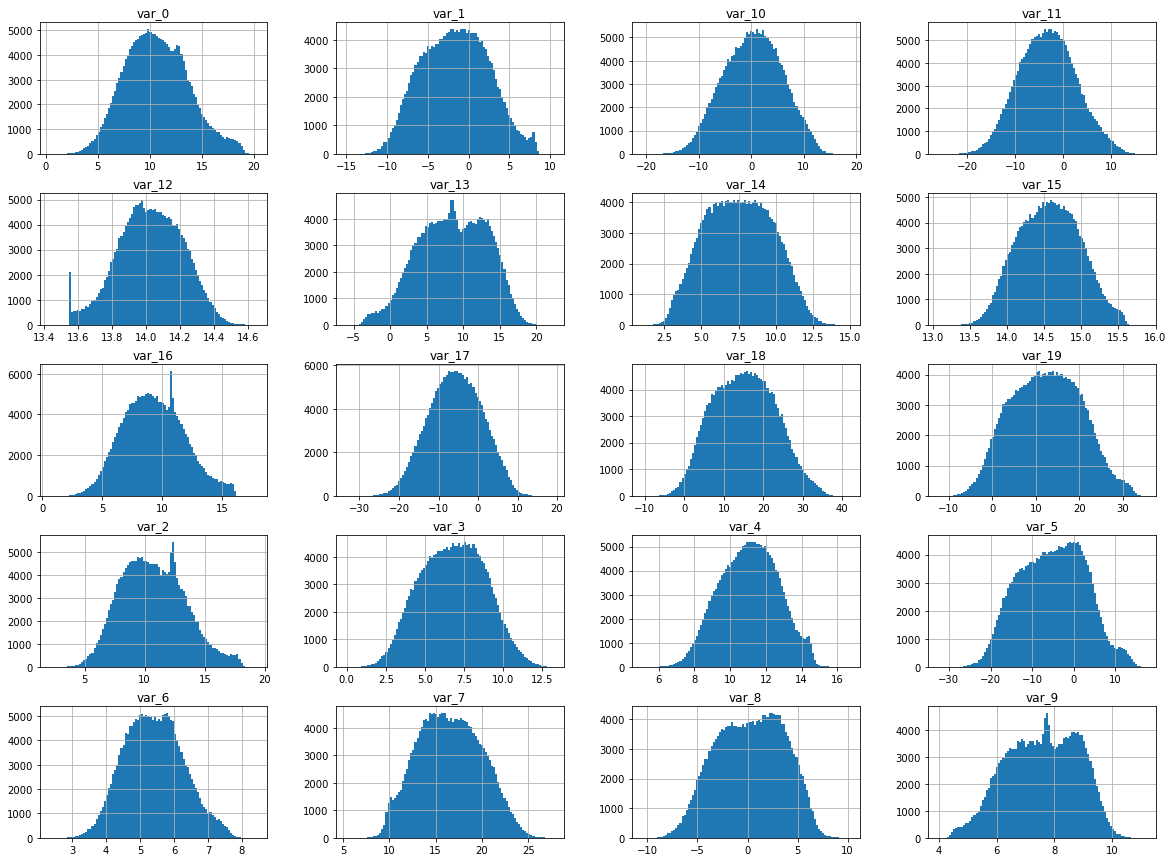

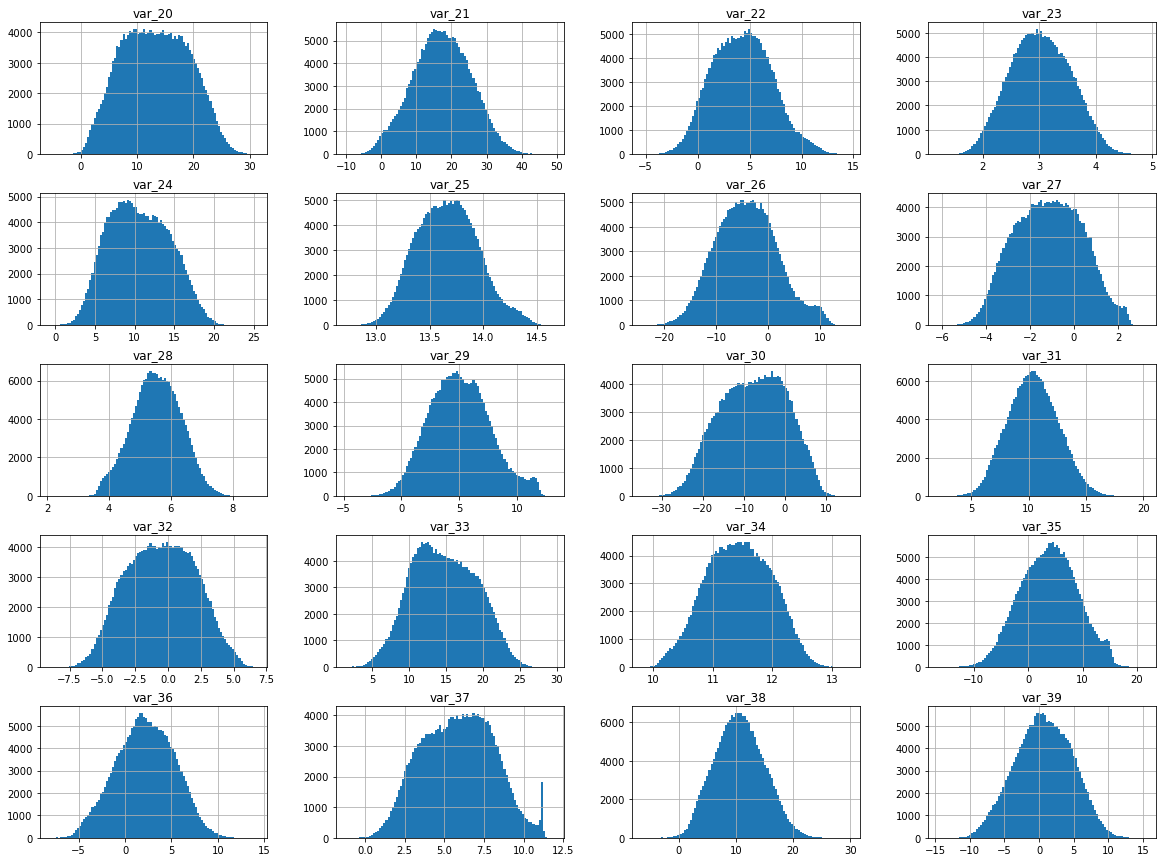

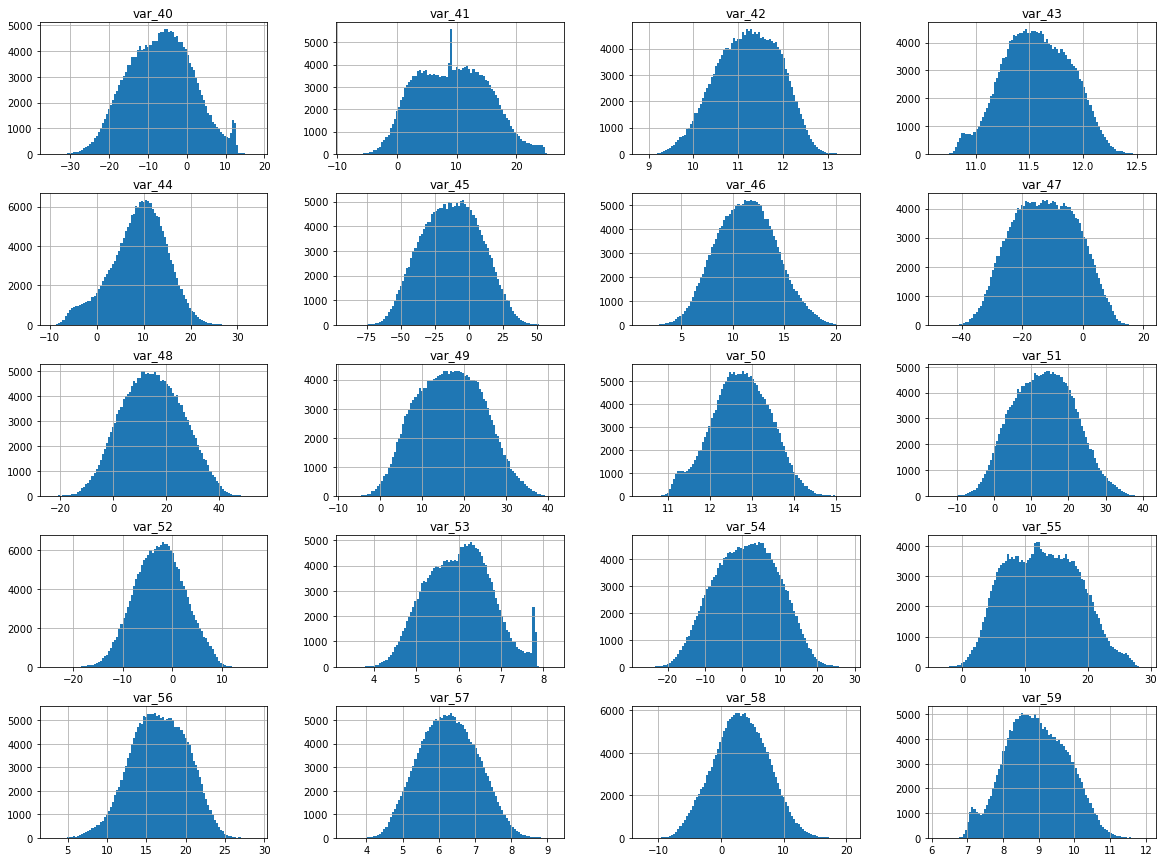

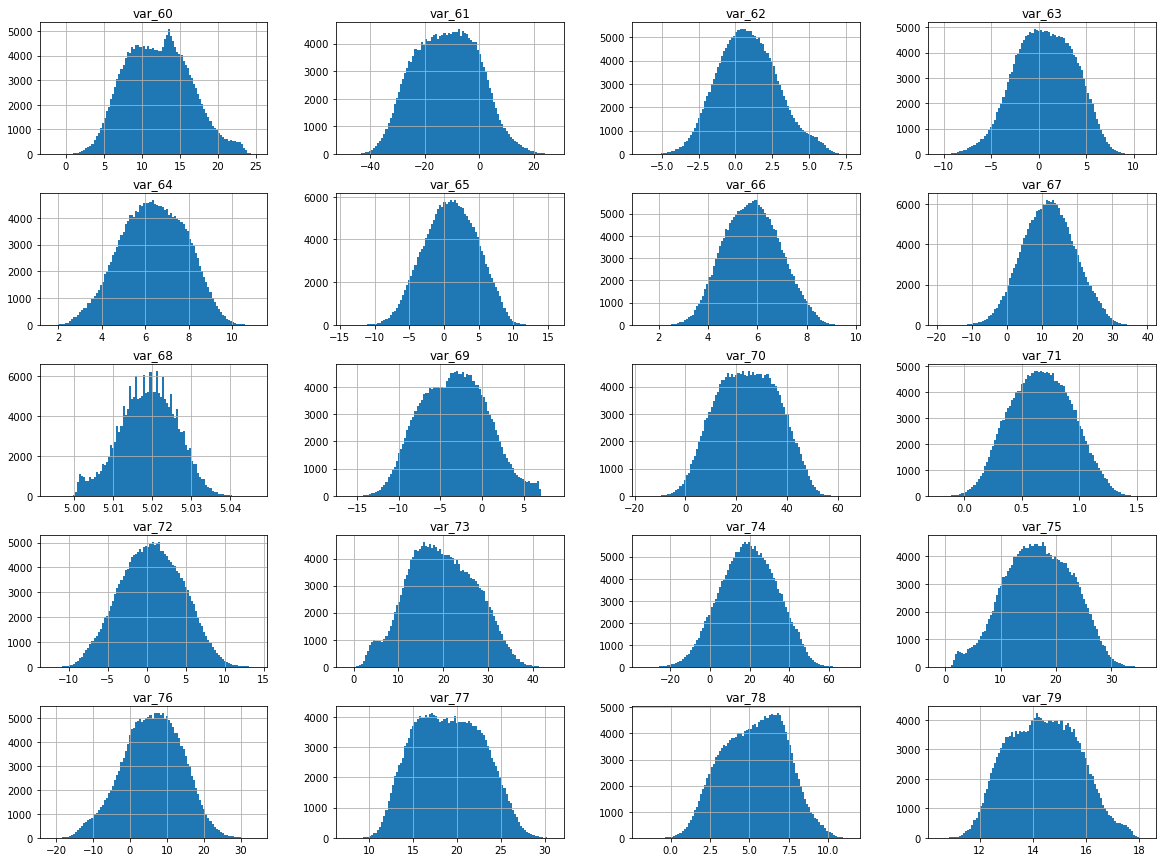

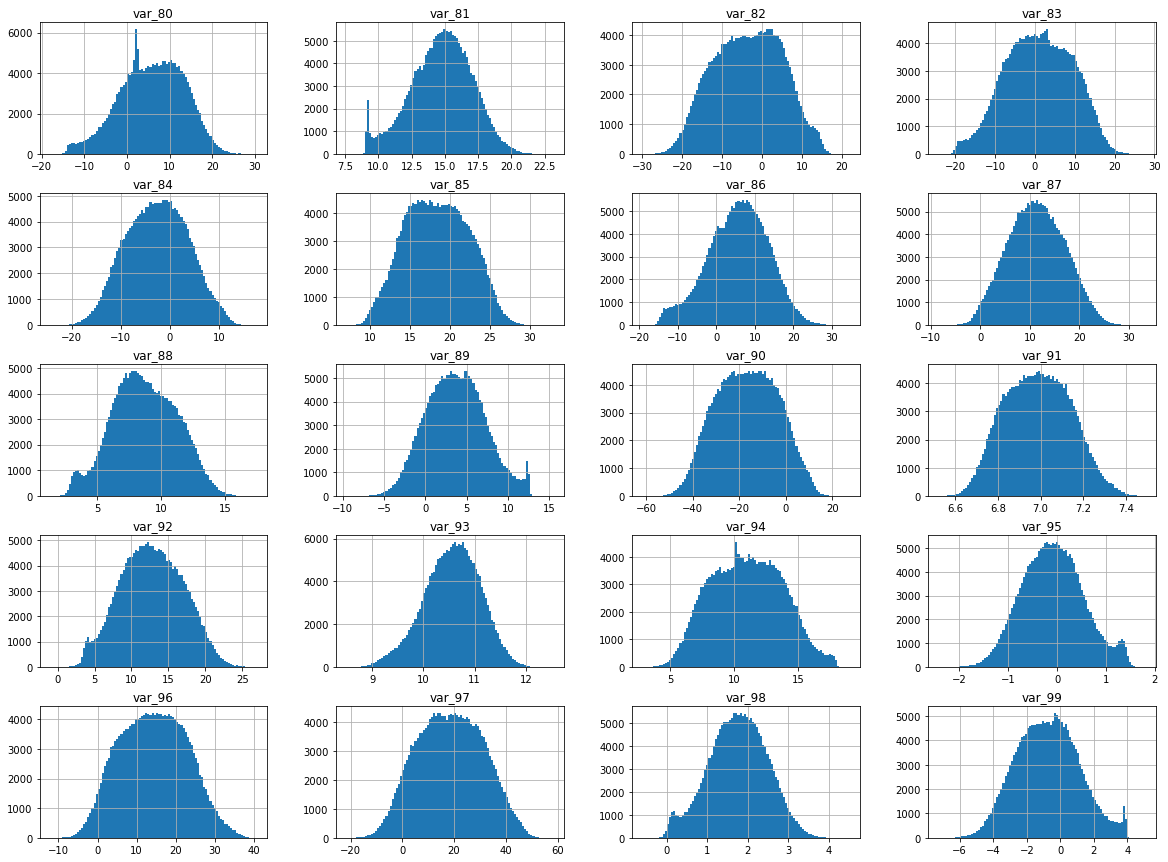

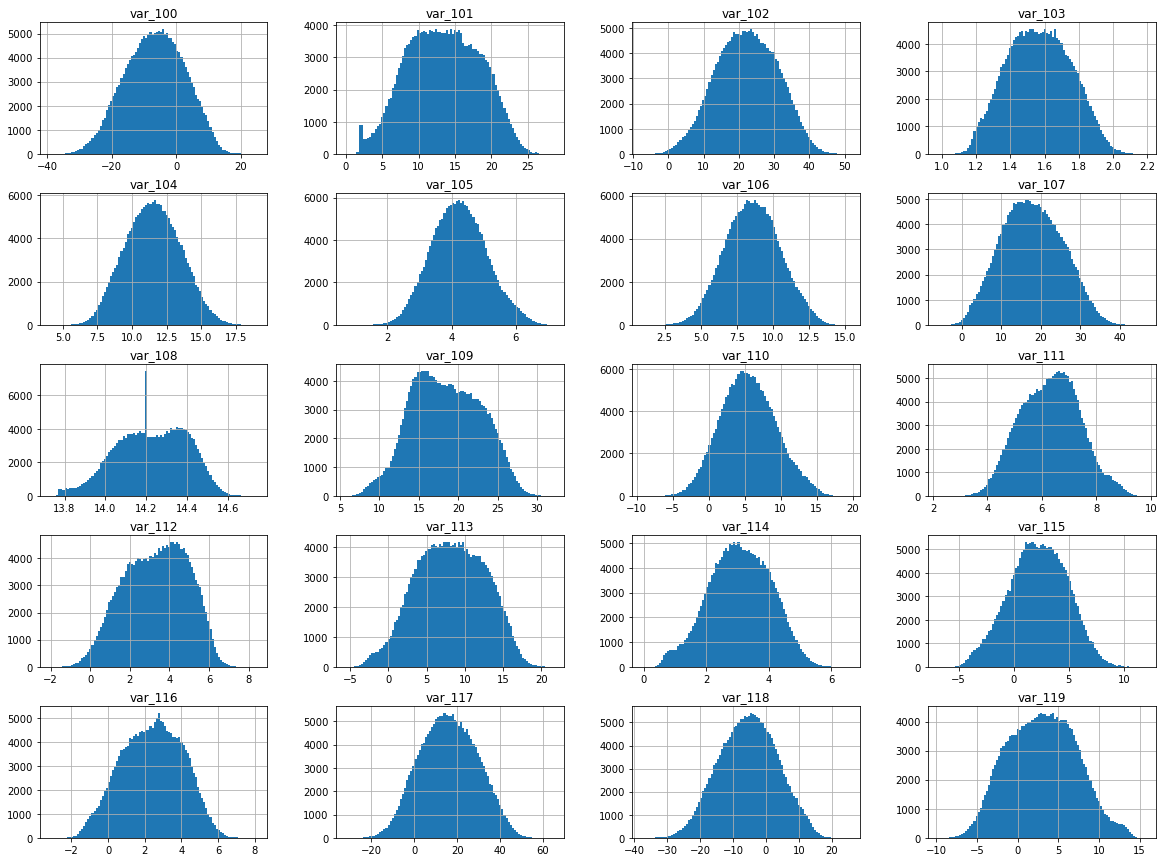

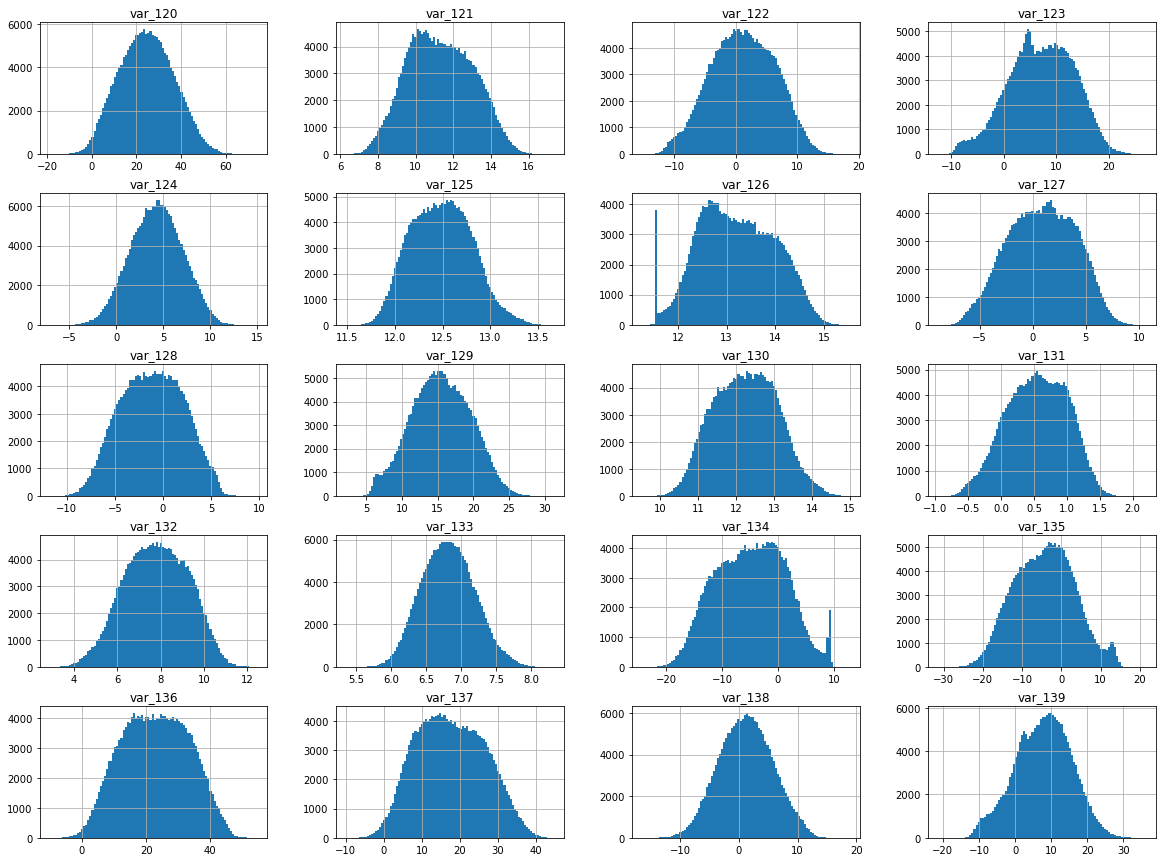

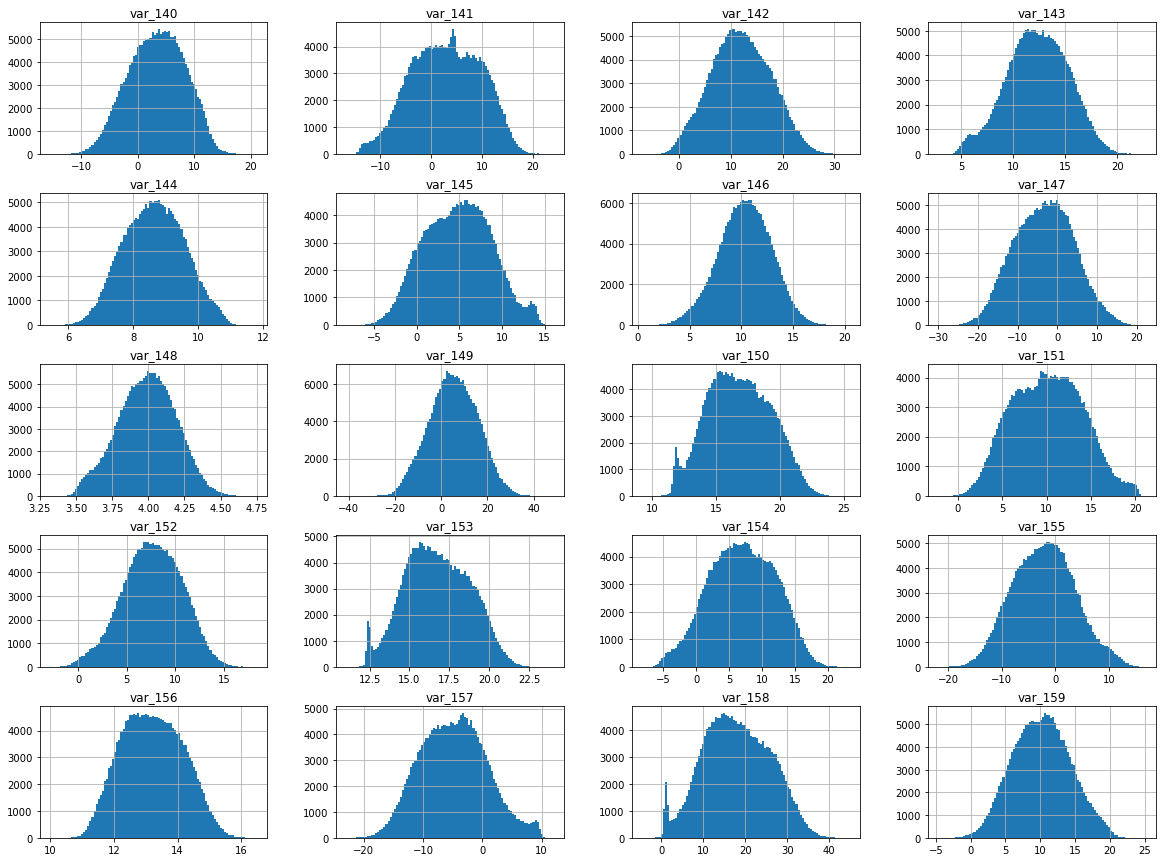

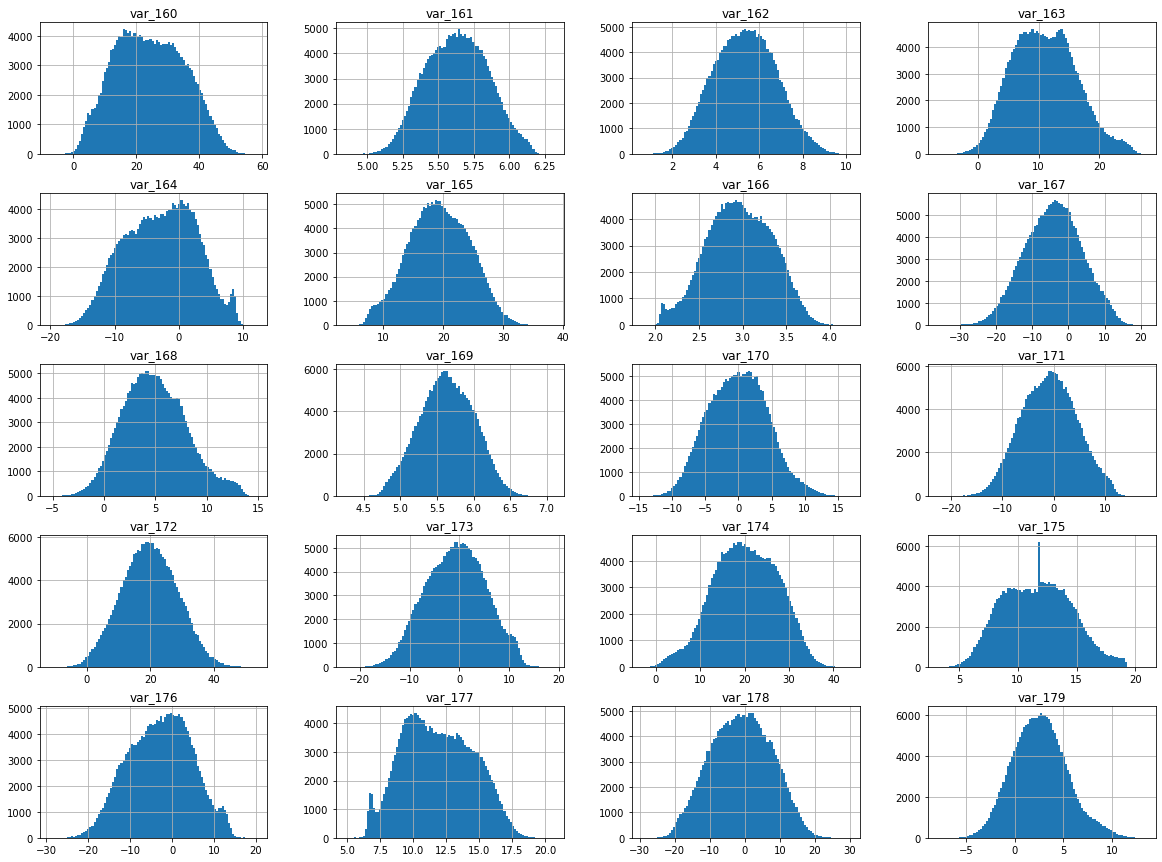

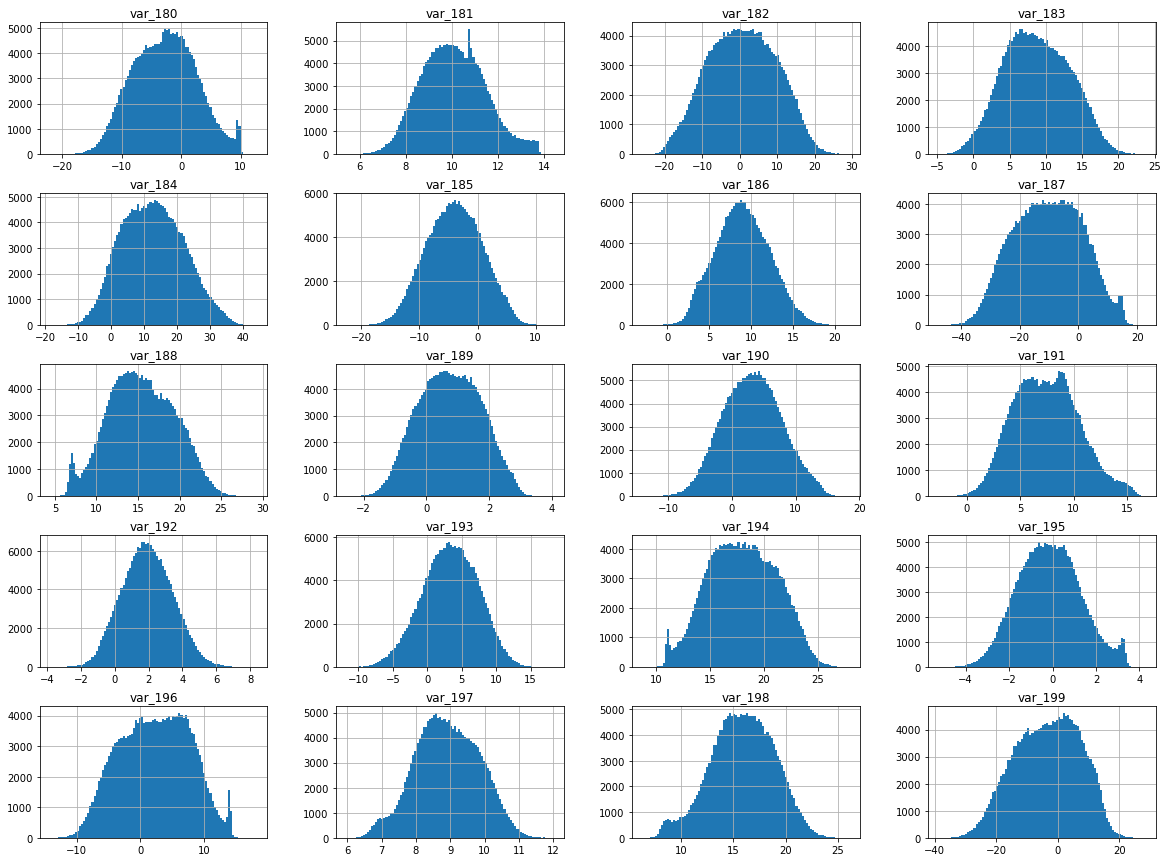

In [87]:
for c in chunks:
    c.hist(bins=100, figsize=(20,15))
    plt.show()

- Most of the data follows a normal distribution
- Most of the data falls in a very small range

Let's insert target variable to end of each chunk, then let's correlate each to the target

In [121]:
top_50_names = ['none'] * 50
top_50 = []
for c in chunks:
    c['target'] = target
    corr = c.corr()
    values = corr["target"].sort_values(ascending=False)
    min_val = min(top_50) if top_50 else -1
    for name, val in values.iteritems():
        if name != 'target':
            if len(top_50) != 50:
                top_50.append(val)
                top_50_names[len(top_50) - 1] = name
            if val >= min_val:
                for i in range(len(top_50)):
                    if val >= top_50[i]:
                        top_50[i] = val
                        top_50_names[i] = name
                        break
top_50

[0.06673084561268226,
 0.06427529889094545,
 0.060558424722052445,
 0.0583670160493676,
 0.05597341401296887,
 0.050001766603094876,
 0.04831540644382932,
 0.047113676868896906,
 0.040996701916838206,
 0.038530560909000026,
 0.03723950571507851,
 0.032647003672519534,
 0.031811181426375706,
 0.031190426860403794,
 0.028284541775824772,
 0.027524472696791858,
 0.026908986245721866,
 0.025434483562655385,
 0.023607801875416806,
 0.015300841466259534,
 0.062422192885952923,
 0.060558424722052445,
 0.0365671764862824,
 0.030513304014768372,
 0.02847741501345529,
 0.015278173956843487,
 0.014873108518386854,
 0.014114638575744758,
 0.013713754865605518,
 0.00921216373427519,
 5.3115855124896635e-05,
 -0.0013953517675240786,
 -0.003554240210079182,
 -0.0038165673371167957,
 -0.005135072067806532,
 -0.005467138701594279,
 -0.007197537107235046,
 -0.01745852434388749,
 -0.017709372898111052,
 -0.018900636827027653,
 0.06339860914223346,
 0.049530256144057254,
 0.032334391727347235,
 0.03061153

In [122]:
top_50_names

['var_6',
 'var_110',
 'var_22',
 'var_99',
 'var_190',
 'var_179',
 'var_184',
 'var_191',
 'var_164',
 'var_95',
 'var_155',
 'var_162',
 'var_163',
 'var_180',
 'var_195',
 'var_151',
 'var_128',
 'var_199',
 'var_196',
 'var_140',
 'var_26',
 'var_22',
 'var_35',
 'var_32',
 'var_24',
 'var_159',
 'var_187',
 'var_168',
 'var_181',
 'var_189',
 'var_185',
 'var_103',
 'var_136',
 'var_158',
 'var_160',
 'var_183',
 'var_182',
 'var_77',
 'var_193',
 'var_142',
 'var_53',
 'var_40',
 'var_48',
 'var_49',
 'var_52',
 'var_51',
 'var_55',
 'var_47',
 'var_46',
 'var_41']

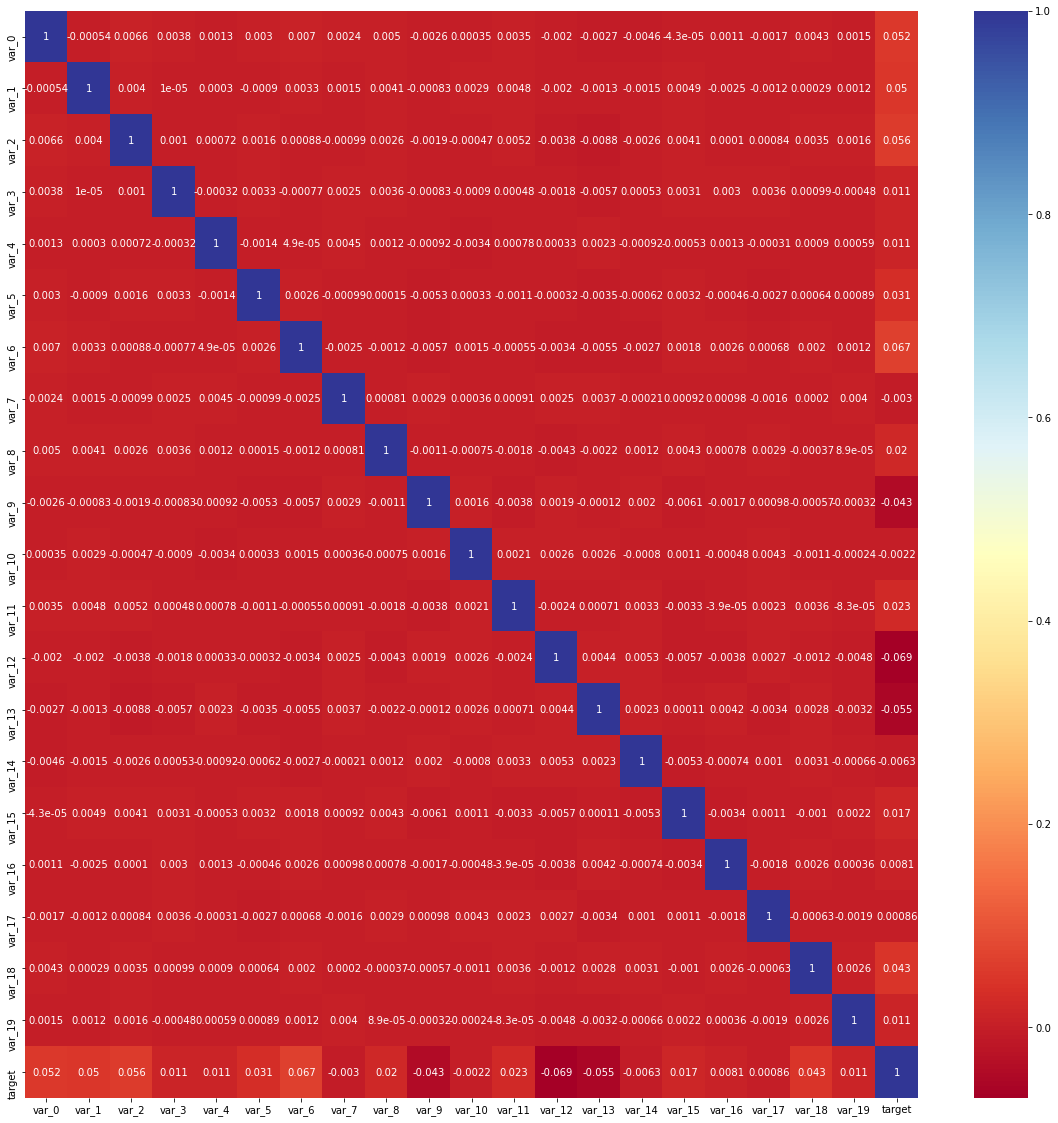

In [93]:
corr = chunks[0].corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap="RdYlBu")

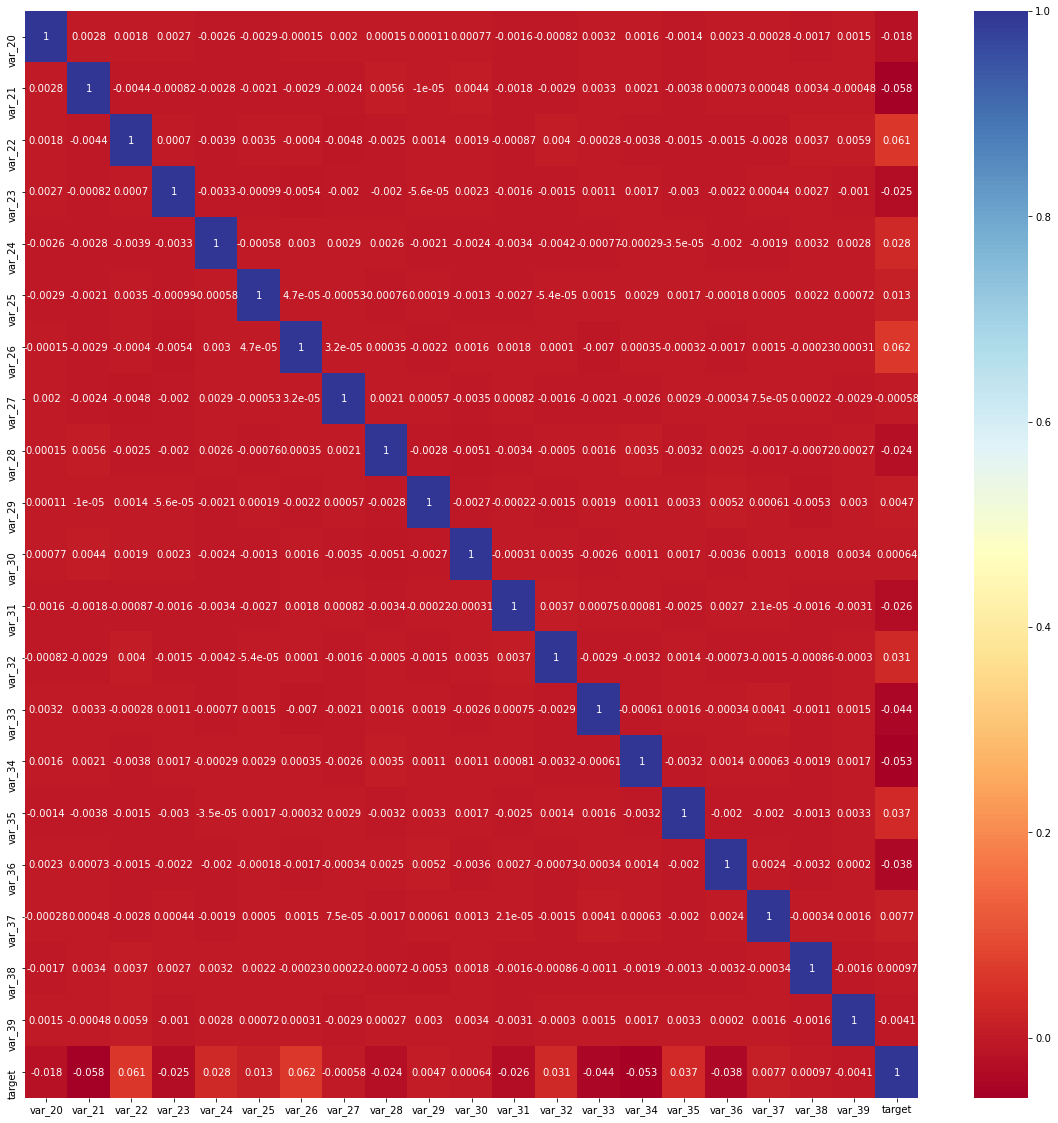

In [94]:
corr = chunks[1].corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap="RdYlBu")

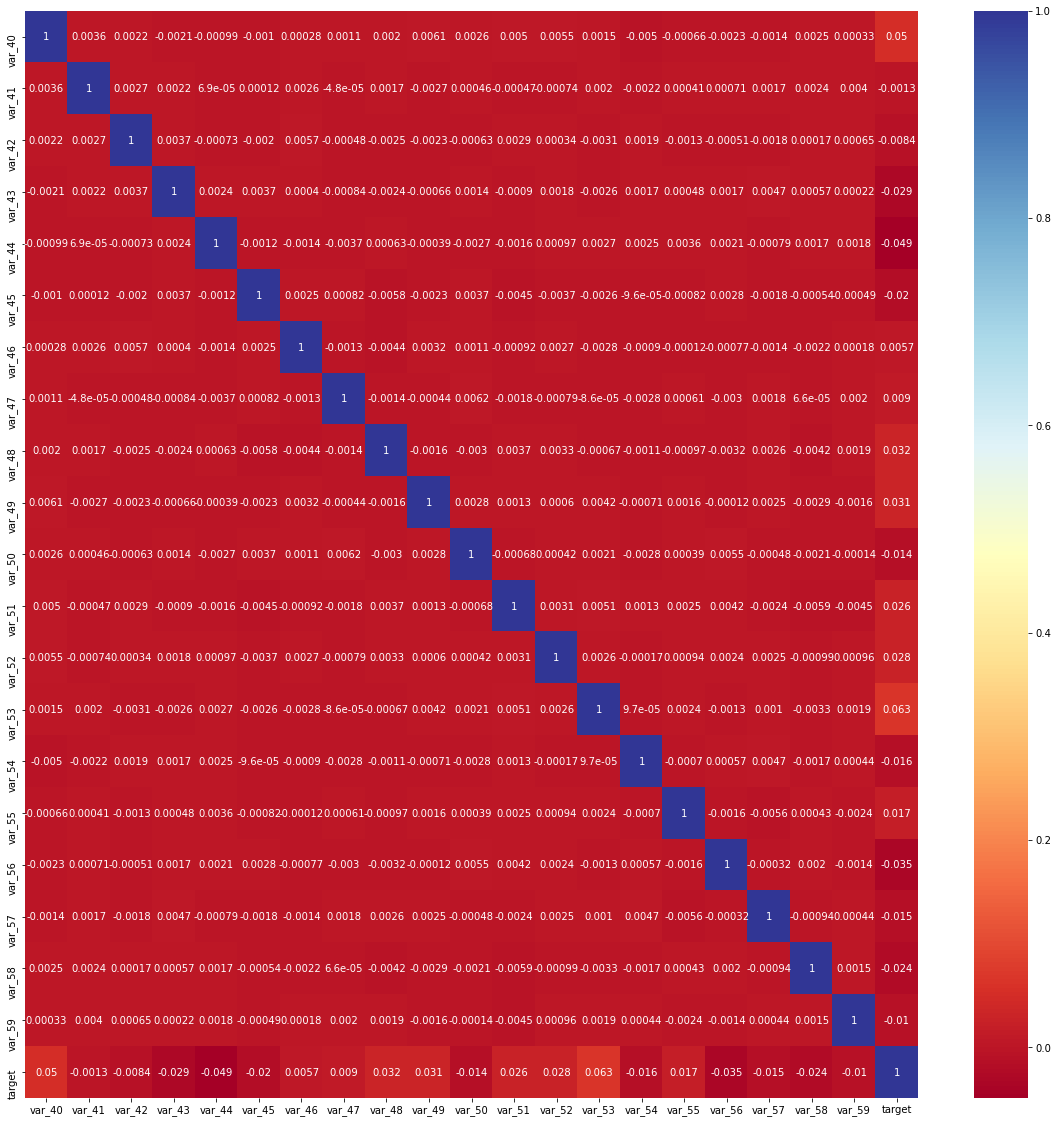

In [95]:
corr = chunks[2].corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap="RdYlBu")

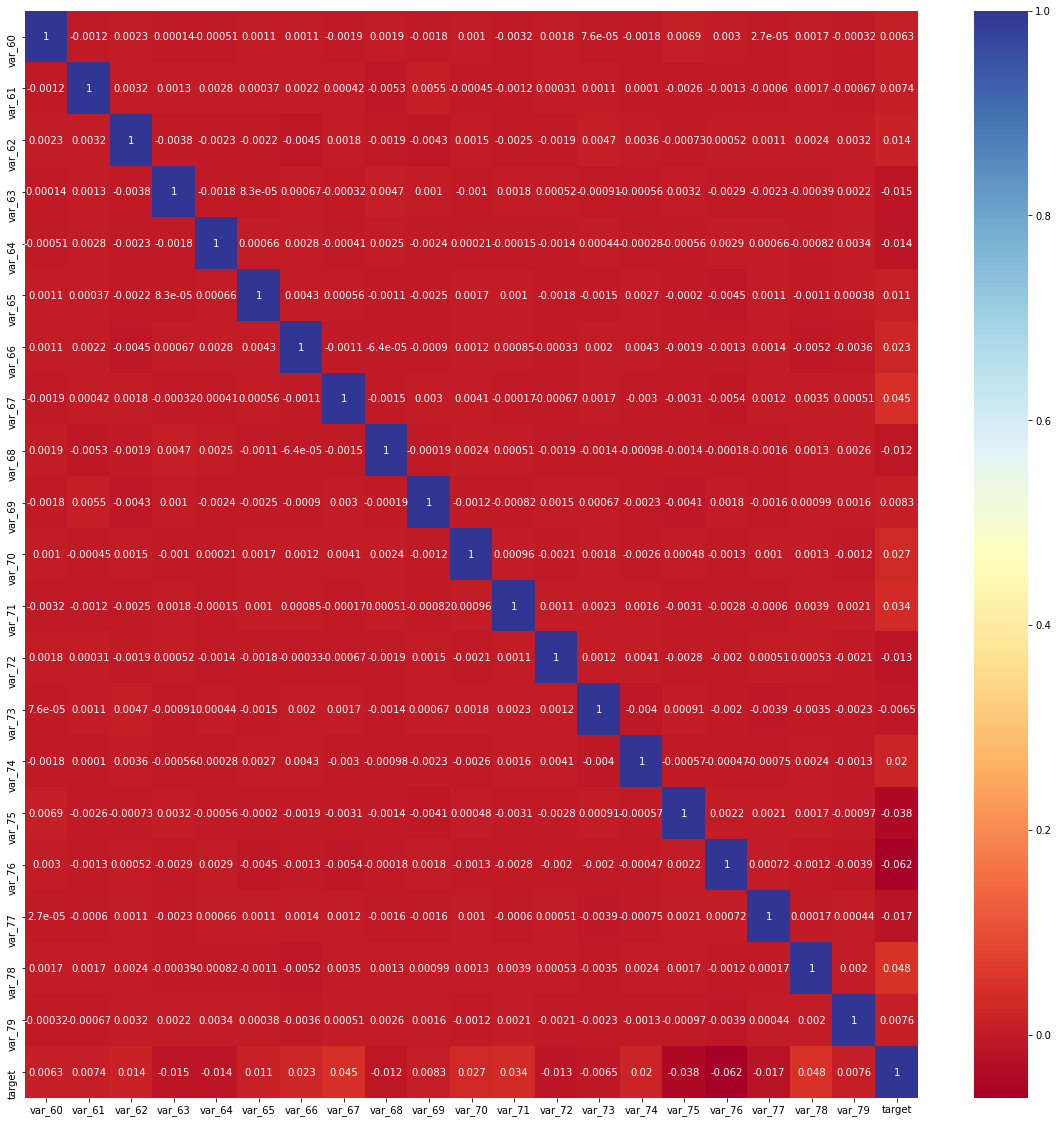

In [96]:
corr = chunks[3].corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap="RdYlBu")

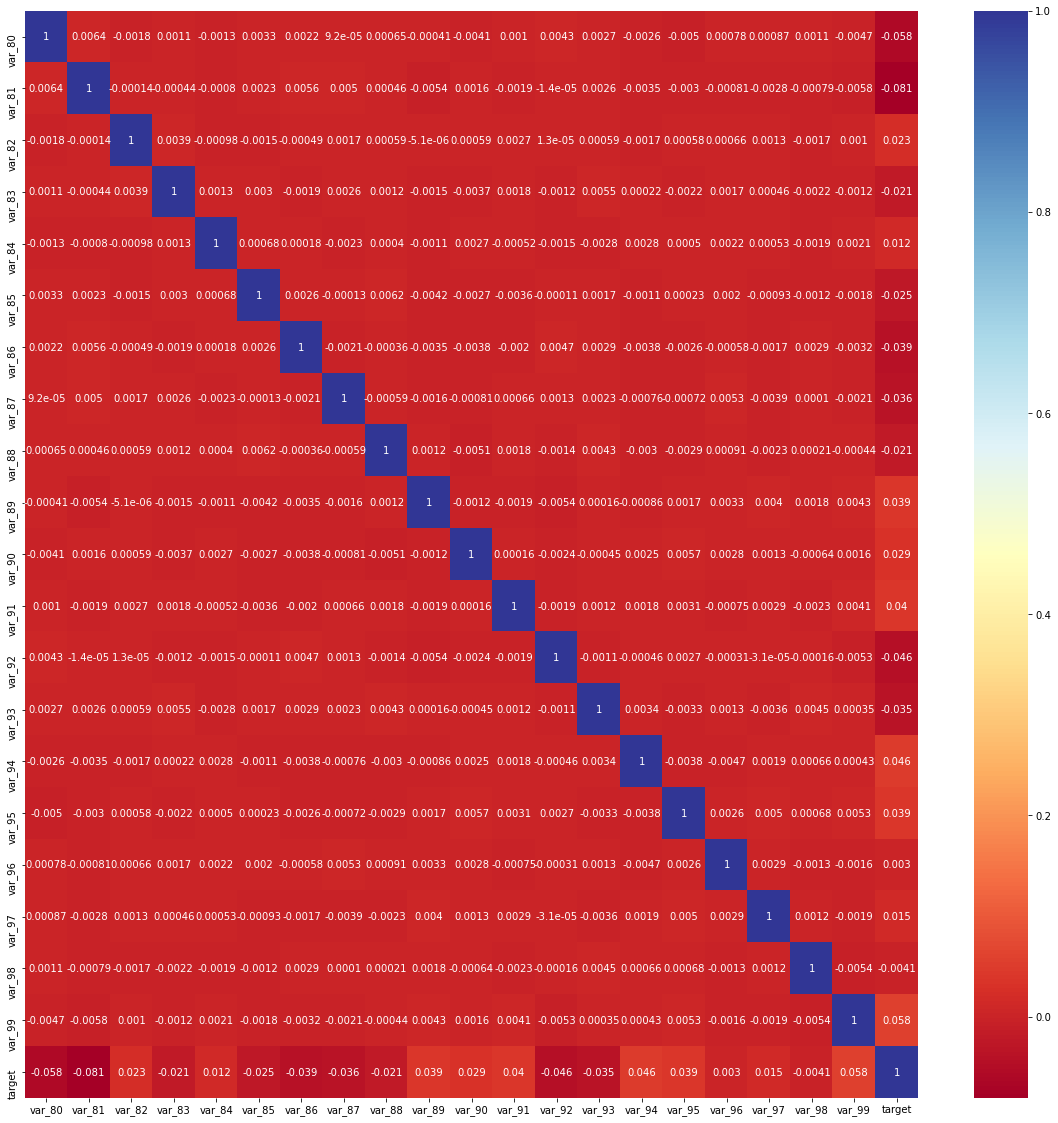

In [97]:
corr = chunks[4].corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap="RdYlBu")

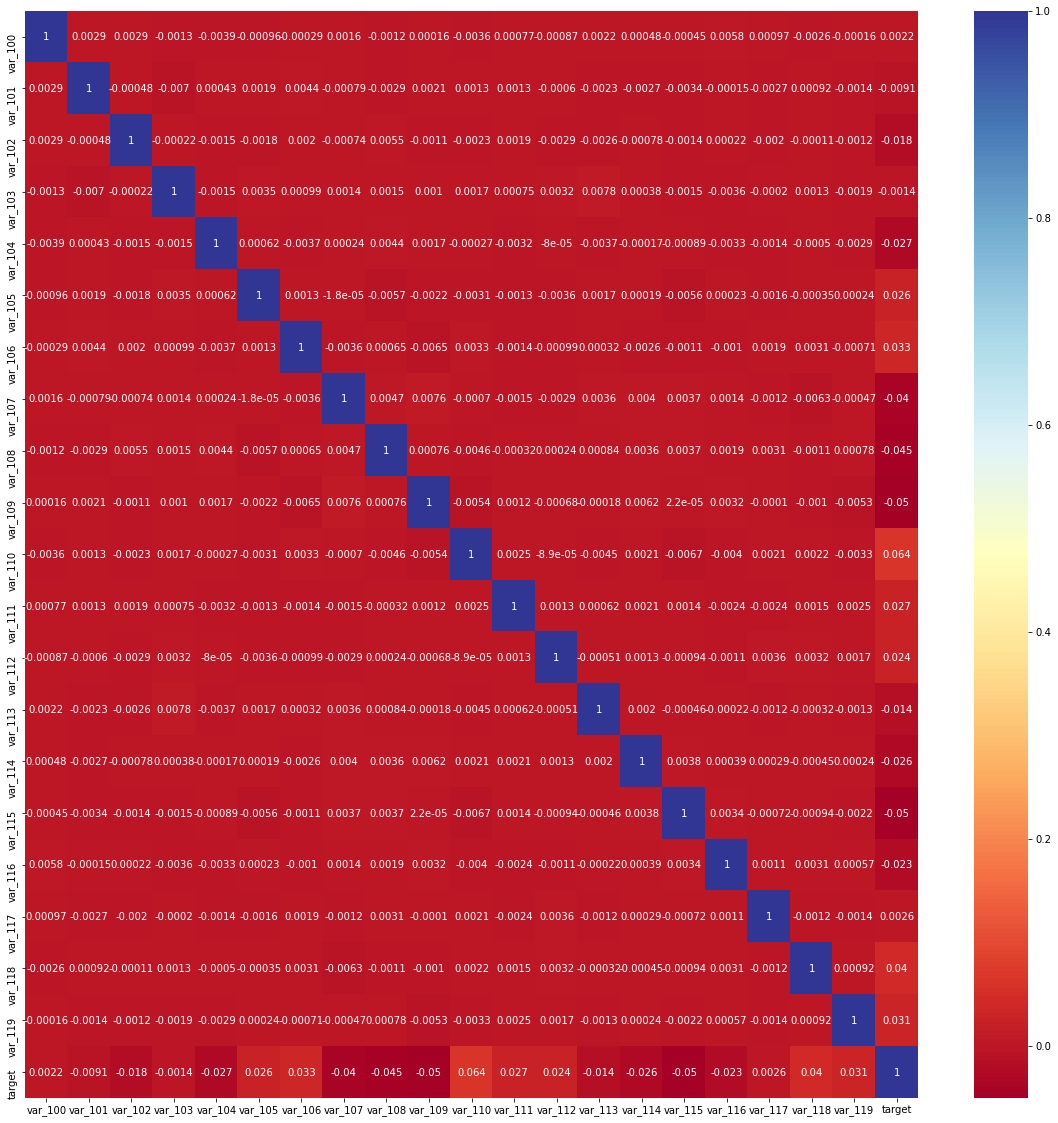

In [98]:
corr = chunks[5].corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap="RdYlBu")

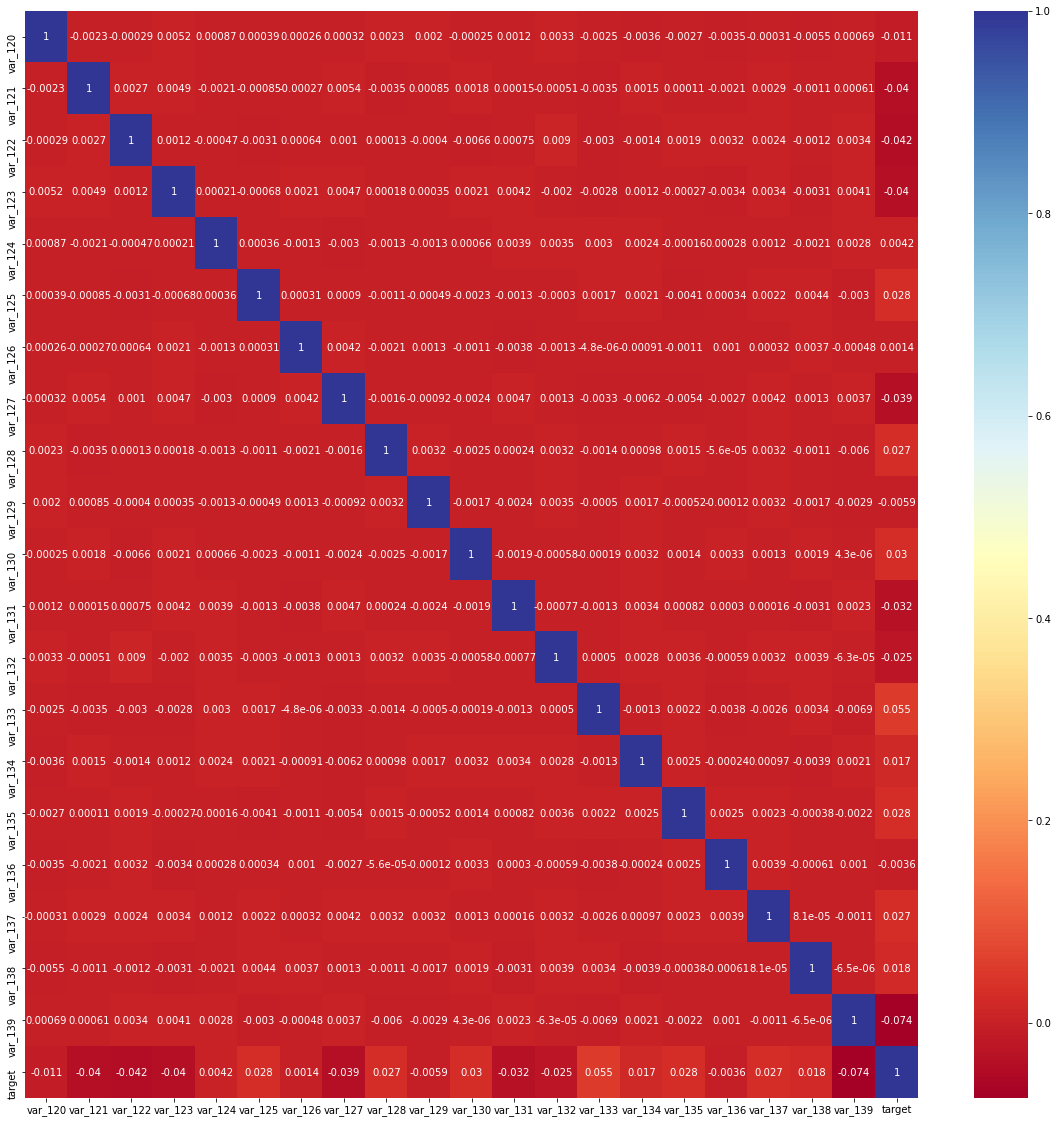

In [99]:
corr = chunks[6].corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap="RdYlBu")

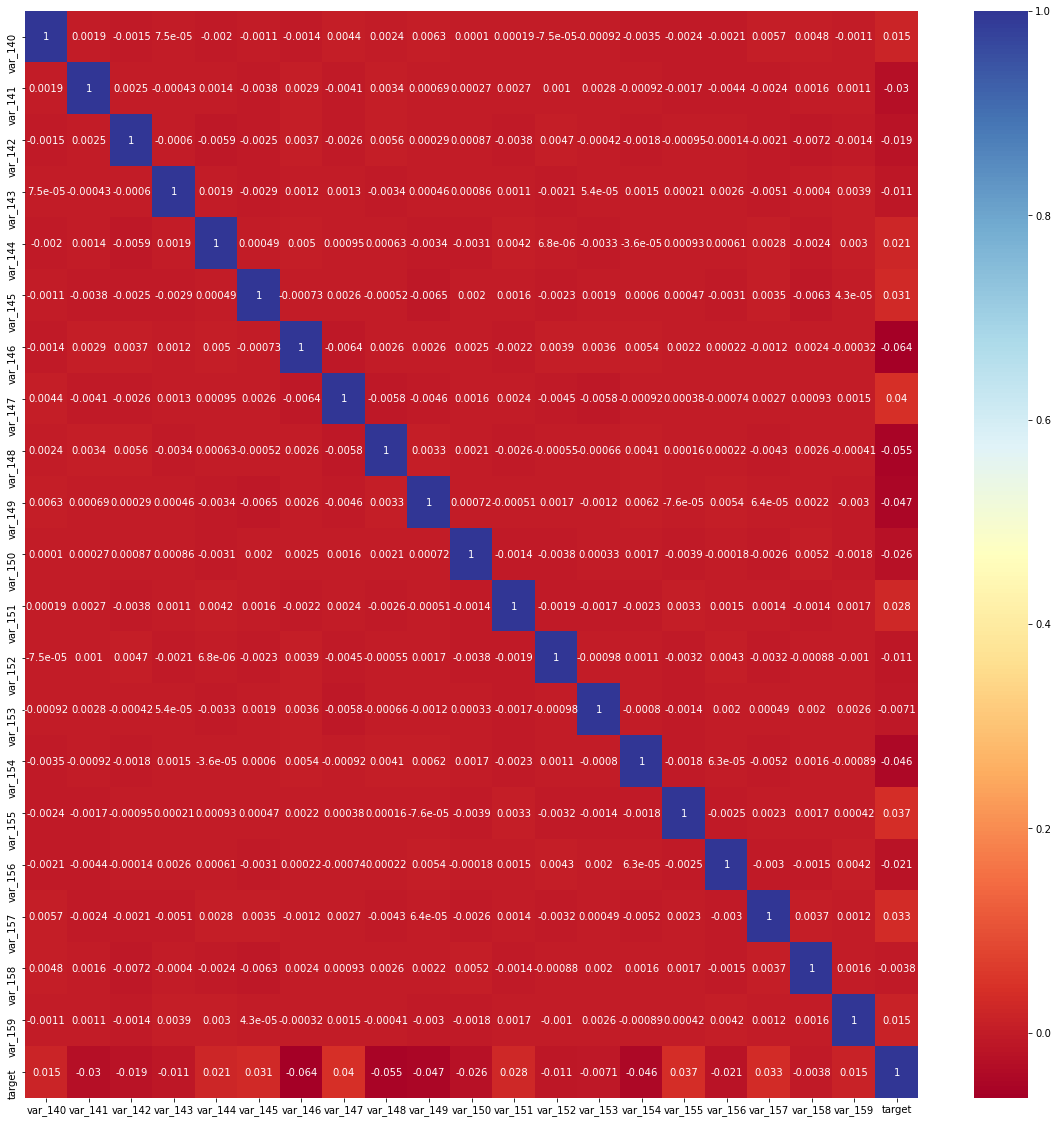

In [100]:
corr = chunks[7].corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap="RdYlBu")

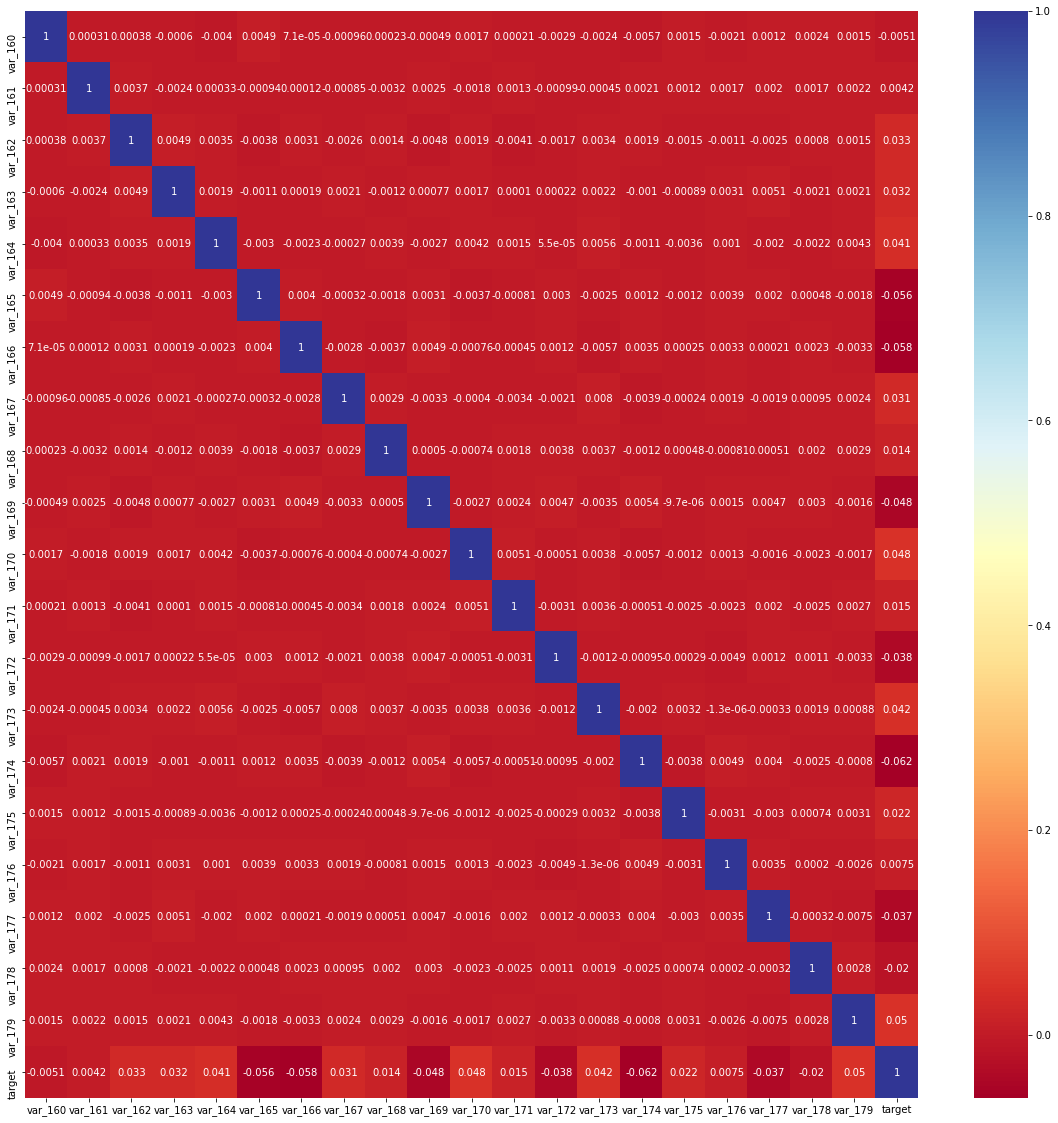

In [101]:
corr = chunks[8].corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap="RdYlBu")

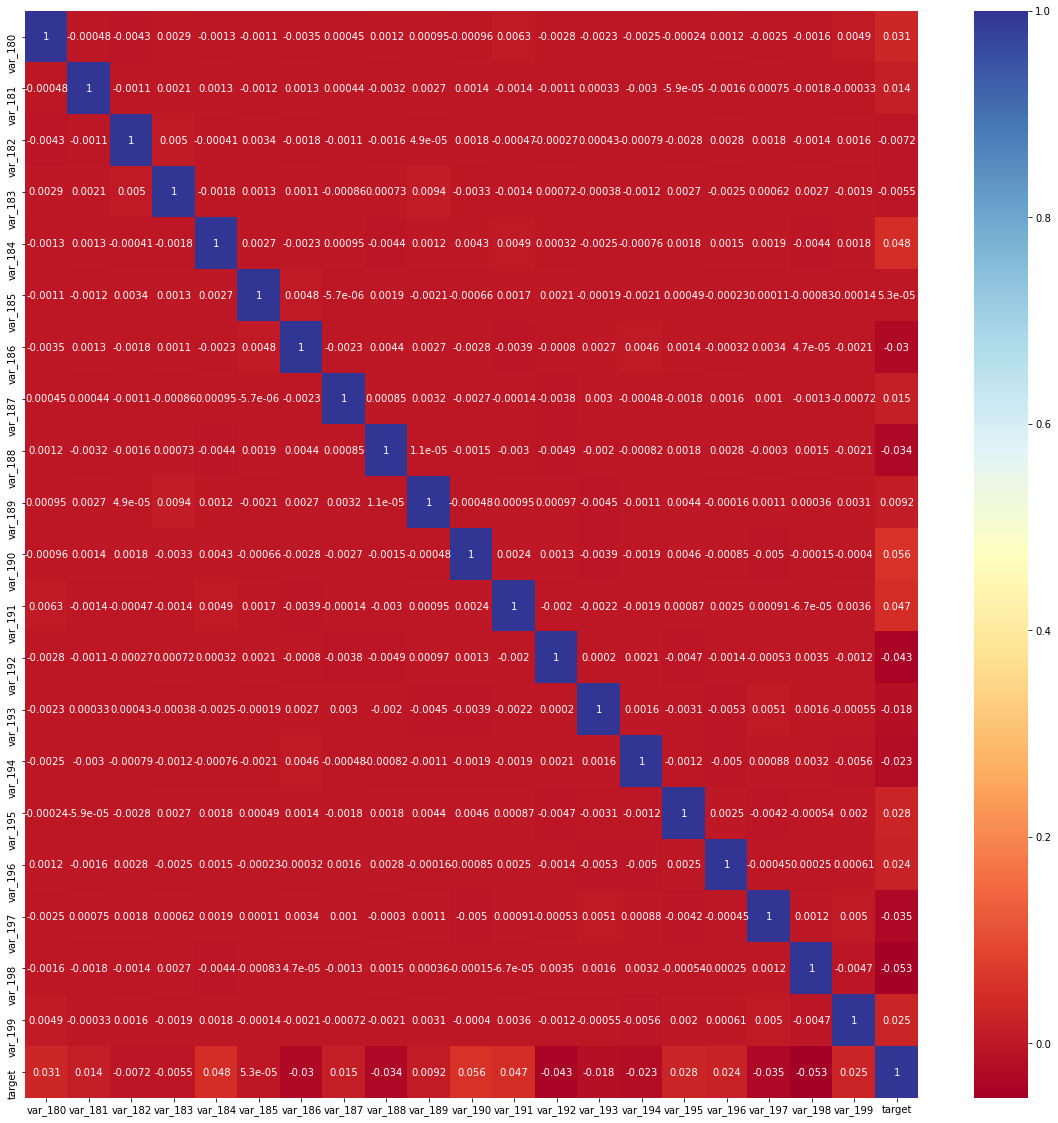

In [102]:
corr = chunks[9].corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap="RdYlBu")